# Using Posterior Predictive Checks for model evaluation

## What is PPC?

TODO

## Imports

In [189]:
import scvi
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import torch
import gc
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy
from scvi_criticism import run_ppc, PPCPlot

# plotting command for the styling
sns.reset_orig()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get the data and model


Here we use the data and pre-trained model obtained from running [this](https://docs.scvi-tools.org/en/stable/tutorials/notebooks/api_overview.html) scvi-tools tutorial.

The dataset used is a subset of the heart cell atlast dataset:  
Litviňuková, M., Talavera-López, C., Maatz, H., Reichart, D., Worth, C. L., Lindberg, E. L., ... & Teichmann, S. A. (2020). Cells of the adult human heart. Nature, 588(7838), 466-472.

In [2]:
model_path = "/Users/valehvpa/GitRepos/scvi-criticism/local/hca"
model = scvi.model.SCVI.load(model_path)

INFO     File /Users/valehvpa/GitRepos/scvi-criticism/local/hca/model.pt already downloaded                        


## PPC + CV

INFO     model=SCVI | metric=cv_cell | n_cells=18641:                                                              
         Mean Absolute Error=0.86,                                                                                 
         Mean Squared Error=1.60                                                                                   
         Pearson correlation=0.80                                                                                  
         Spearman correlation=0.82                                                                                 
                                                                                                                   


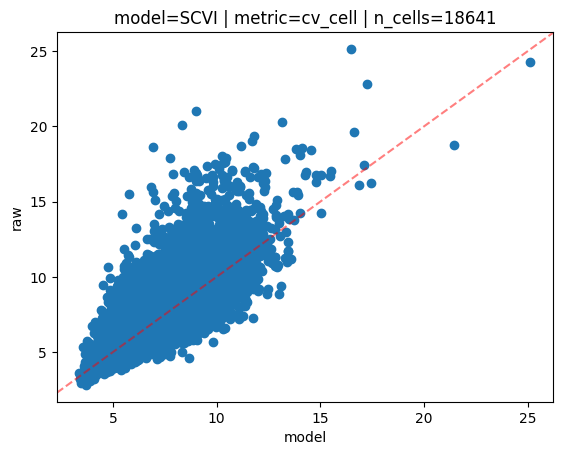

In [4]:
# cv_cell
n_samples = 5
sp = run_ppc(model.adata, model, "cv_cell", n_samples = n_samples, layer="counts")

INFO     model=SCVI | metric=cv_gene | n_cells=18641:                                                              
         Mean Absolute Error=1.37,                                                                                 
         Mean Squared Error=12.26                                                                                  
         Pearson correlation=0.95                                                                                  
         Spearman correlation=0.99                                                                                 
                                                                                                                   


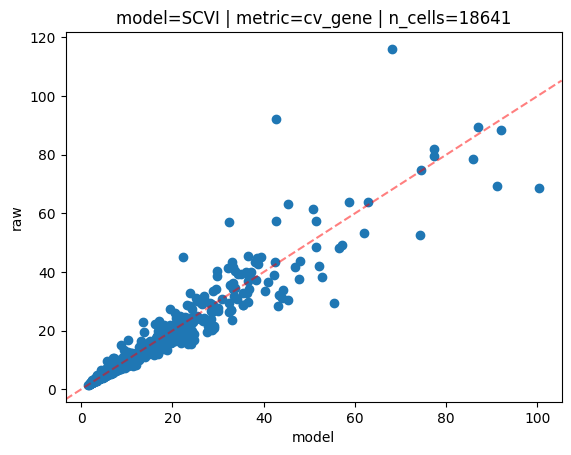

In [6]:
# cv_gene
n_samples = 5
sp = run_ppc(model.adata, model, "cv_gene", n_samples = n_samples, layer="counts")

## PPC + MWU

TODO

## PPC + DE

In [188]:
# cv_cell
n_samples = 1
ppc = run_ppc(model.adata, model, "diff_exp", n_samples = n_samples, layer="counts", de_groupby="cell_type")

/opt/homebrew/Caskroom/miniconda/base/envs/scvi-criticism-2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


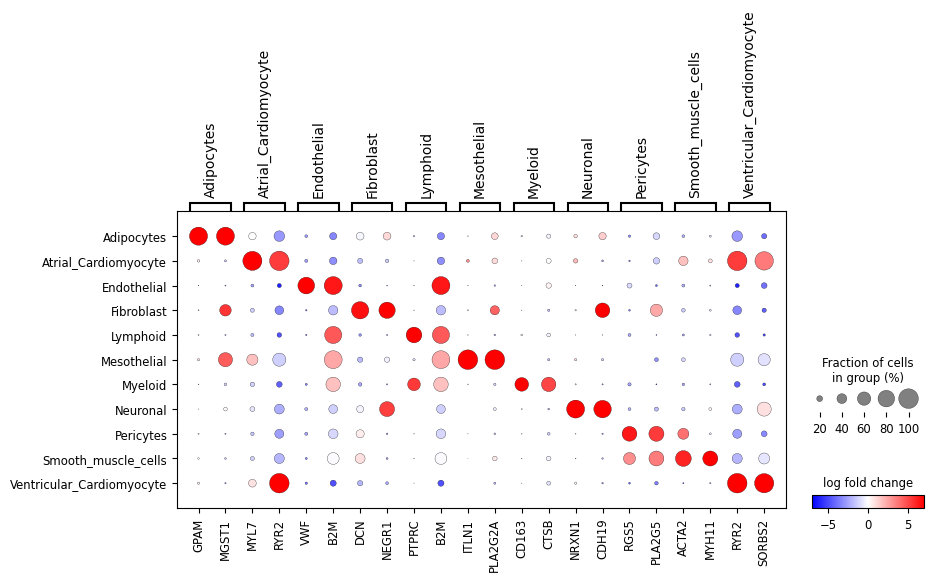

/opt/homebrew/Caskroom/miniconda/base/envs/scvi-criticism-2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


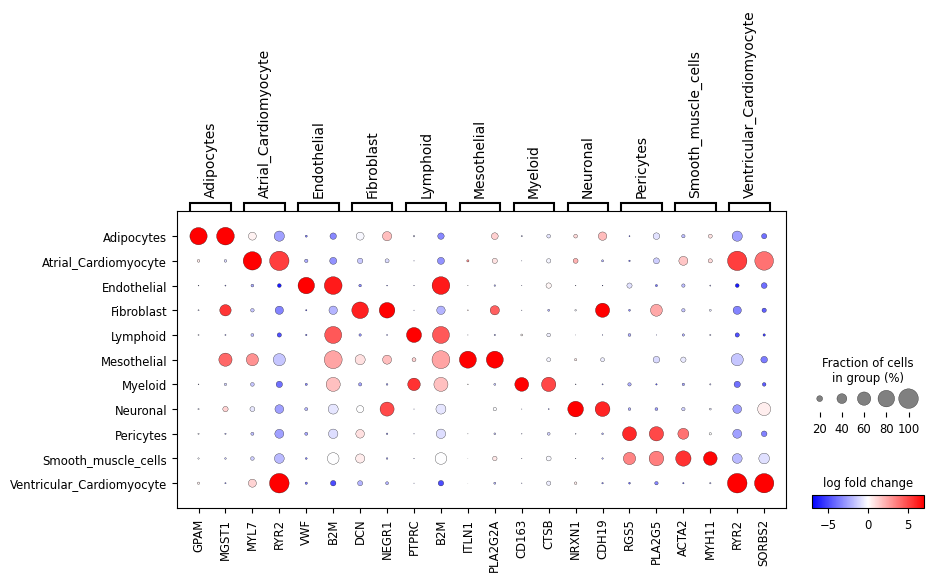

In [190]:
ppc_plt = PPCPlot(ppc)
ppc_plt.plot_diff_exp("SCVI")

/opt/homebrew/Caskroom/miniconda/base/envs/scvi-criticism-2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


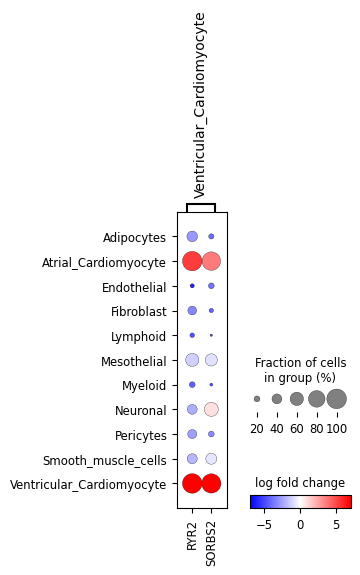

/opt/homebrew/Caskroom/miniconda/base/envs/scvi-criticism-2/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


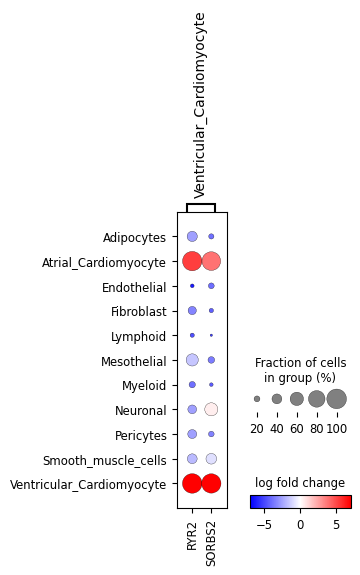

In [192]:
ppc_plt.plot_diff_exp("SCVI", var_names_subset=["Ventricular_Cardiomyocyte"])

INFO     LFC (1 vs all) gene expressions across groups:                                                            
         Mean Absolute Error=1.01,                                                                                 
         Pearson correlation=0.91                                                                                  
         Spearman correlation=0.95                                                                                 


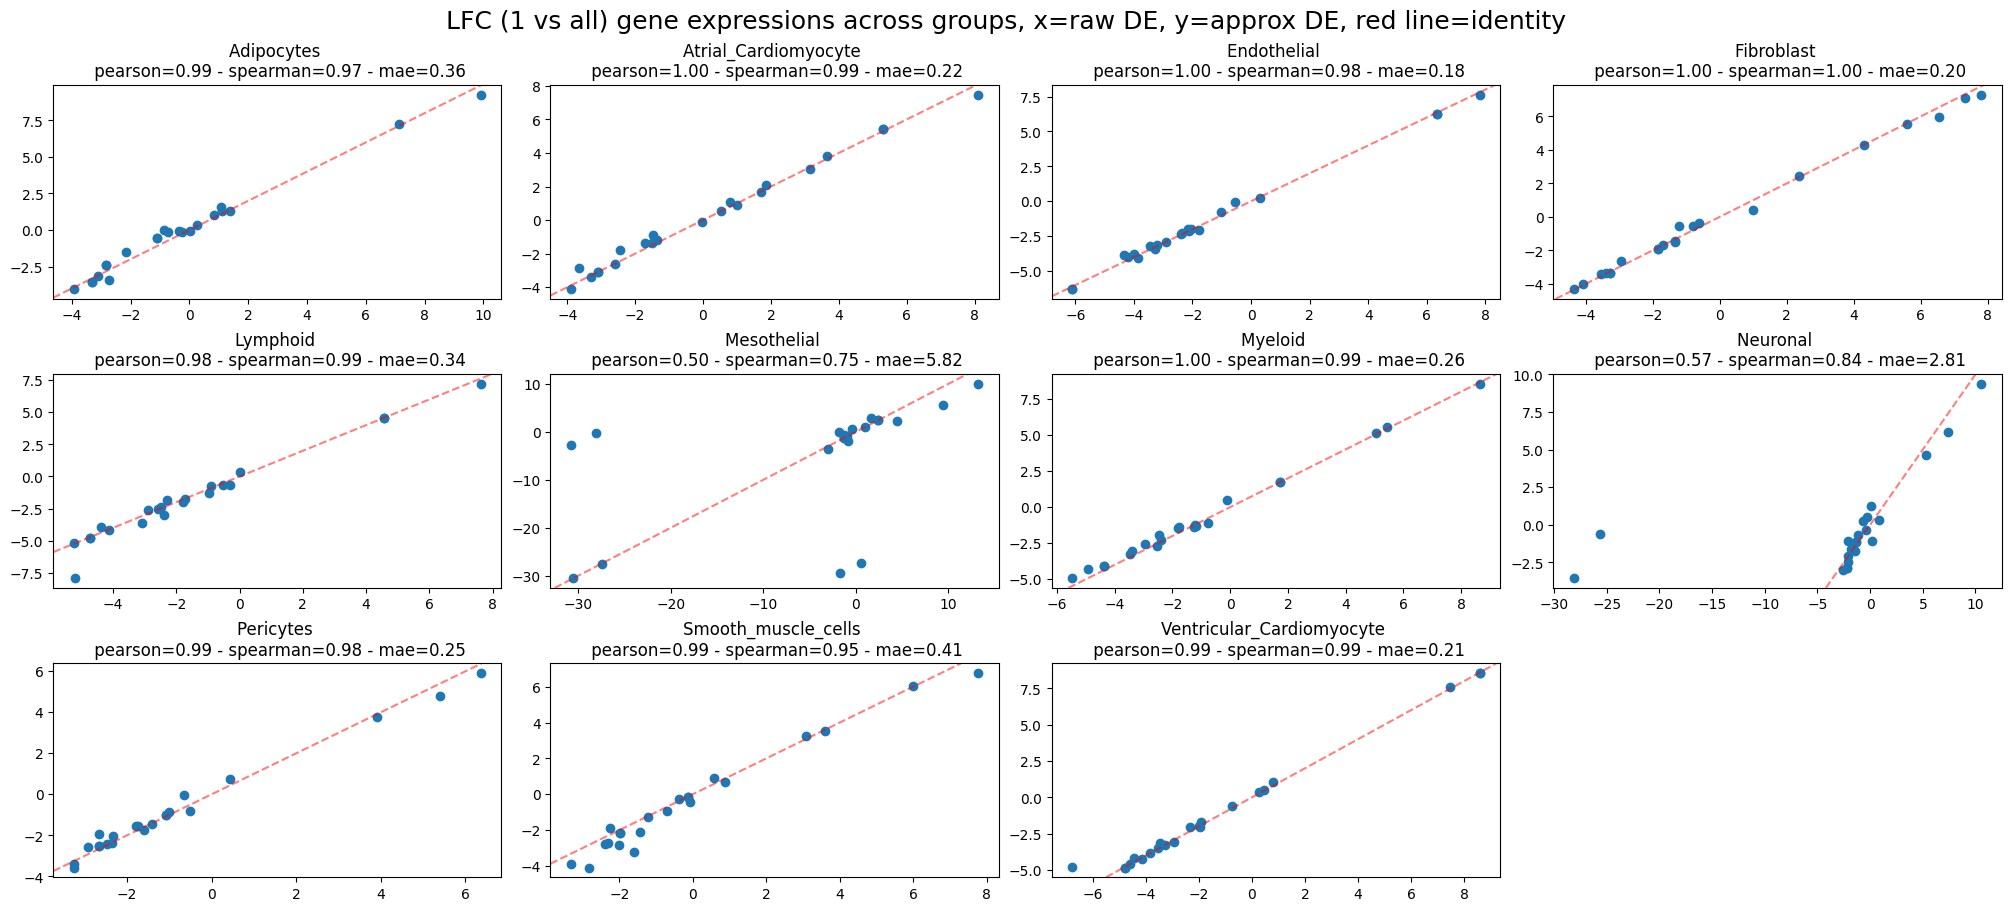

In [200]:
sp.plot_diff_exp("SCVI", plot_kind="lfc_comparisons")

INFO     fractions of genes expressed per group across groups:                                                     
         Mean Absolute Error=0.02,                                                                                 
         Pearson correlation=0.99                                                                                  
         Spearman correlation=0.98                                                                                 


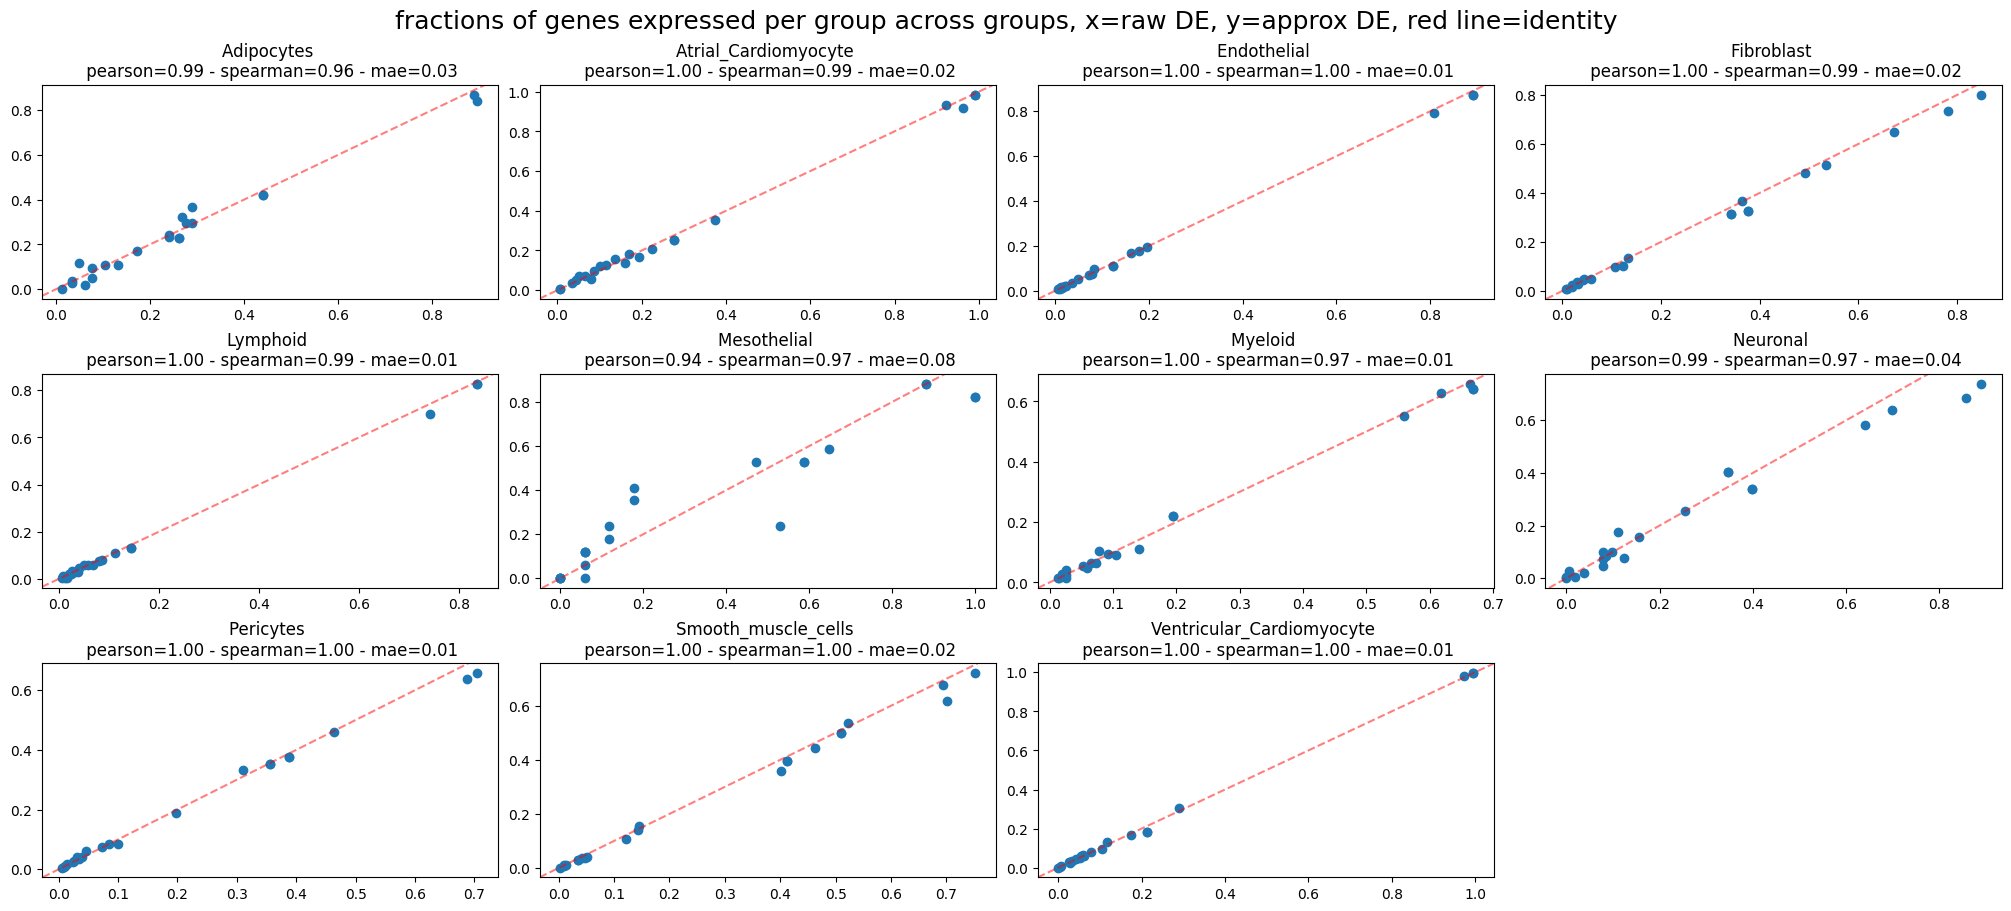

In [212]:
ppc_plt.plot_diff_exp("SCVI", plot_kind="fraction_comparisons")

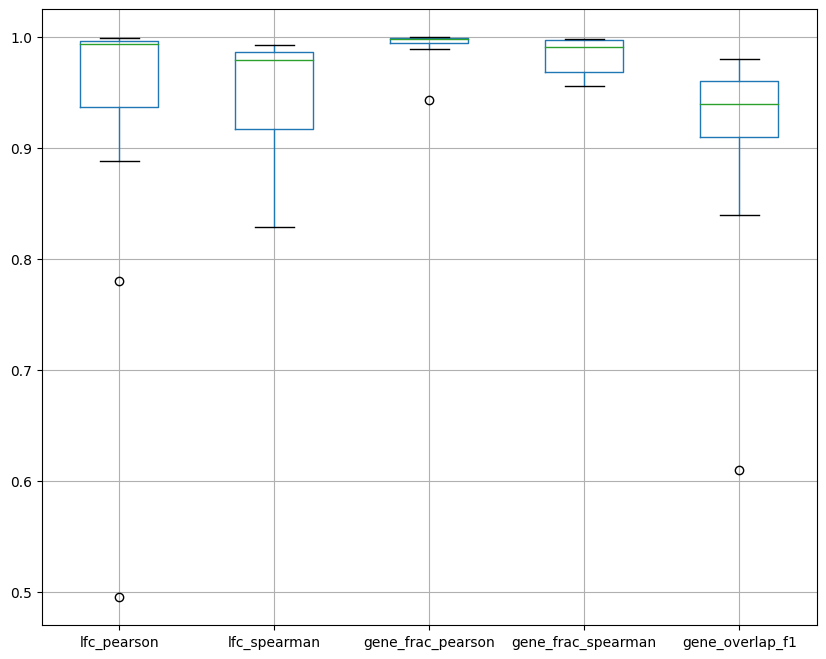

In [213]:
ppc_plt.plot_diff_exp("SCVI", plot_kind="summary")